 ## Partie 01 : caractéristiques de l'idéologie

### a) Charisme de l'idéologie 

On note le charisme du leader sur une échelle de 1 à 10.

1 represente un total manque de charisme, 5 un charisme banal, 10 un très fort charisme.

In [101]:
def var_char(pop, ad_in, charisme):
    """int*int -> int" 
    retourne la variation d'adhesion en fonction du charisme du leader"""
    ad = ad_in;
    
    if charisme>=5 :
        ad = ad + pop*(charisme*0.03)
    
    return int(ad)

var_char(100,4,10)  

34

### b) Morale de l'idéologie :

Nous partons avec la vision manichéenne de la moral (bien et mal).

Nous la notons sur une echelles de 1 à 10 ( 1 : morale très faible, 10 : morale forte)

si la morazle est basse mais que le nombre d'adherentse est elevé (+ de 75%), la notion de morale devient floue pour les individus et on constatera une "hausse" de l'adhesion avec toujours une minorité à l'esprit critique.

Pareil, lorsque la morale et forte mais que trop de gens y adhère, une minorité d'individus choisis de ne pas y adhérer.

Il n'y aura jamais 100% d'adherents car la morale est un trait très subjectif.

In [79]:
def var_mor(pop, ad_in, moral, gen):
    ""
    ad = ad_in;
    if moral<5 :
        if gen == 1 :
            return ad_in
        if ad >= pop*0.75 :
            if (ad + ad_in*0.04)< pop :
                ad = ad + ad_in*0.04
            else :
                ad = pop
            "representation de la minorité à l'esprit critique present dans tous les cas"
            ad = ad - ad*0.01
    if moral >= 5 :
        if (ad + ad_in*(moral*0.01))< pop :
            ad = ad + ad_in*(moral*0.01)
        if (ad + ad_in*(moral*0.02))> pop :
            ad = pop
        if ad >= pop*0.75 : 
            ad = ad - ad*0.01
        "representation de la minorité pas d'accord lorsque trop de gens sont d'accord"
        
    if ad < 0 :
        return 0
    return int(ad)
        
var_mor(1000, 1000, 9, 2)

990

### c) Véracité scientifique de l'idéologie

Elle sera définie par deux valeurs: "1" lorsque l'idéologie se base sur des faits scientifiquement corrects, "0" lorsque la science ne supporte pas cette idée. 

Cela dépendra également du type de population. 

On définiera deux types de populations(ouverte, traditionnaliste).
Population science-friendly : 1
Population scientifico-sceptique : 0

In [77]:
def val_sci(pop, ad_in, science, typ_pop_science):
    ""
    ad = ad_in
    if (science == 0 and typ_pop_science == 0) or  (science == 1 and typ_pop_science == 1) :
        ad = ad + ad_in*0.05
        if ad > pop :
            ad =  pop
        else :
            ad = int(ad)
    if (science == 0 and typ_pop_science == 1) or (science == 1 and typ_pop_science == 0) :
        ad = int(ad - ad_in*0.05)
        if ad < 0 :
            return 0
    return ad
    
val_sci(1000, 990, 1, 1)        

1000

## Test 1

Nous allons définir des variables, puis observer le changement d'adhérants à l'idéologie selon les facteurs énumérés plus haut.
Nous comparerons ensuite cela à la version final après l'ajout d'autres facteurs.

In [71]:
#population de départ 
pop = 1000
#adherent de départ
ad_in = 20
#generation 
gen = 10
#moral
moral = 5
#charisme 
charisme = 10
#science
science = 0
#Type croyance scientifique de la population
typ_pop_science = 0

In [80]:
def cara_idee(pop, ad_in, gen, mor, charisme, science) :
    """"int*float*int*float*float*float -> int
    retourne le nombre d'adherants à une idée en fonction des 3 caractéristiques d'une idée pendant un certain nombre de generations"""
    compt = 0
    A = ad_in
    L = [ad_in]
    while compt < gen :
        A = var_char(pop, A, charisme)
        A = var_mor(pop, A, moral, gen)
        A = val_sci(pop, A, science, typ_pop_science)
        
        L.append(A)
        compt = compt + 1
    return L

cara_idee(pop, ad_in, gen, 10, 3, science)

[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

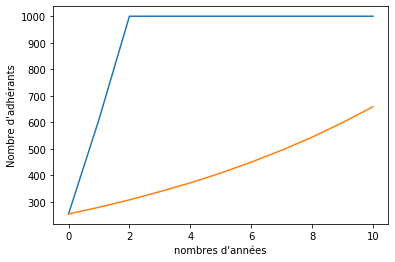

In [104]:
import numpy as np
import matplotlib.pyplot as plt


#A : exemple
A = cara_idee(pop, ad_in, gen, 3, charisme, science)
#B : exemple avec forte morale
B = cara_idee(pop, ad_in, gen, 10, 3, science)
plt.figure()
plt.plot(A)
plt.plot(B)

plt.ylabel("Nombre d'adhérants")
plt.xlabel("nombres d'années")

plt.show()

## Partie 02 : Les facteurs sociaux 

Deux facteurs entrent en jeu : la classe social et l'environnement. 

Nous avons déjà pris en compte les adherents pour la morale de départ ce qui constitue deja un facteur social. 

Nous allons prendre en compte le facteur de la classe sociale et le penchant politique de l'idéologie.

### a) Classes sociales :

Cela va constituer notre base. 
En effet on prend les classes des individus comme appuyie pour connaitre le nombre approximatif d'adhérants à une idée au départ.

In [44]:
#On se base sur des études faites en 2010 (la gauche l'emporte cette année là), 
#(et je m'y attendais pas mais les ouvriers votent plus à droite ??)
#les bobos à gauche 

#classe moyenne : 70% de chance de voter à gauche et 30% à droite 
taux_classe_sup = 0.0
#classe ouvrière : 49% de chance de voter à gauche et 51% à droite
taux_classe_inf = 0.9
#classe supérieure : 58% de chance de voter à gauche et 42% à droite
taux_classe_moy = 0.1
type_classe = 'droite'

In [46]:
def classe(pop, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe):
    if type_classe == 'gauche' :
        A = taux_classe_sup*pop*0.7 + taux_classe_inf*pop*0.51 + taux_classe_moy*pop*0.58
    if type_classe == 'droite' :
        A = taux_classe_sup*pop*0.3 + taux_classe_inf*pop*0.49 + taux_classe_moy*pop*0.42
    return int(A)
    
classe(pop, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe)    

483

On va génerer un nombre aléatoire (mais pas si aléatoire que ça) d'adherants de départ.

In [58]:
import random

def adherents_depart(pop, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe):
    return int(random.randint(1,classe(pop, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe)+1))

    
    
    
adherents_depart(pop, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe)

250

### b) influence de l'entourage et effet de masse :

Nous nous interessant ici à l'évolution des adhésions en fonctions du nombre d'adhérants de départ.

In [59]:
def var_social(pop, ad_in):
    ad = ad_in
    if ad < pop :
        if ad_in < 0.5*pop :
            if ad_in <= 0.25*pop :
                ad =(ad - ad*0.1)
            else :
                ad =(ad - ad*0.01)
        if ad_in >= 0.5*pop :
            if ad_in >= 0.75*pop :
                ad =(ad + ad*0.1)
            else :
                ad =(ad + ad*0.01)
    if ad >= pop :
        return pop
    return ad

## Test 2 

On test le code, en prenant cette fois ci en compte l'influence de l'entourage.

In [87]:
def presque_final (pop,ad_in, gen, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe, moral, charisme, science):
    compt = 0
    A = ad_in
    L = [ad_in]
    while compt < gen :
        A = var_social(pop, A)
        A = var_char(pop, A, charisme)
        A = var_mor(pop, A, moral, gen)
        A = val_sci(pop, A, science, typ_pop_science)
        
        L.append(A)
        compt = compt + 1
    return L
presque_final(pop,ad_in, gen, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe, moral, charisme, science)

[255, 607, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

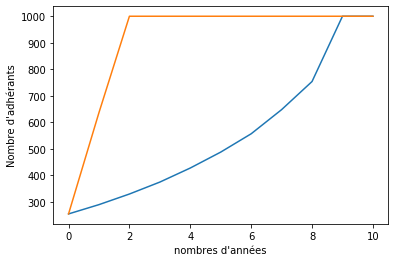

In [108]:
import numpy as np
import matplotlib.pyplot as plt


#A : exemple
A = presque_final (pop,ad_in, gen, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe, 10, 4, science)
#B : exemple avec forte morale
B = presque_final (pop,ad_in, gen, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe, 10, 10, science)
plt.figure()
plt.plot(A)
plt.plot(B)

plt.ylabel("Nombre d'adhérants")
plt.xlabel("nombres d'années")

plt.show()

On modifie la variable "ad_in" pour quelle corresponde le plus possible à la réalité en se basant sur le vote de classe.

In [82]:
ad_in = adherents_depart(pop, taux_classe_sup, taux_classe_inf, taux_classe_moy, type_classe)
print(ad_in)

255
